In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

pd.options.display.float_format = '{:20.2f}'.format

pd.set_option('display.max_columns', 999)

In [113]:
customers_df = pd.read_csv('data/Customers.csv')
transactions_df = pd.read_csv('data/Transactions.csv')
Products_df = pd.read_csv('data/Products.csv')

In [114]:
customers_df

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15
...,...,...,...,...
195,C0196,Laura Watts,Europe,2022-06-07
196,C0197,Christina Harvey,Europe,2023-03-21
197,C0198,Rebecca Ray,Europe,2022-02-27
198,C0199,Andrea Jenkins,Europe,2022-12-03


In [115]:
transactions_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68
...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86


In [116]:
Products_df

,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31
...,...,...,...,...
95,P096,SoundWave Headphones,Electronics,307.47
96,P097,BookWorld Cookbook,Books,319.34
97,P098,SoundWave Laptop,Electronics,299.93
98,P099,SoundWave Mystery Book,Books,354.29


In [117]:
Sample_df  = pd.merge(transactions_df,Products_df,on='ProductID')
Sample_df = pd.merge(Sample_df,customers_df,on='CustomerID')

In [118]:
Sample_df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price_x,ProductName,Category,Price_y,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24 08:30:27,1,459.86,459.86,SoundWave Smartwatch,Electronics,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04 02:15:24,3,1379.58,459.86,SoundWave Smartwatch,Electronics,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05 13:05:32,4,1839.44,459.86,SoundWave Smartwatch,Electronics,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29 10:16:02,2,919.72,459.86,SoundWave Smartwatch,Electronics,459.86,Joshua Hamilton,Asia,2024-11-11


In [119]:
Sample_df.rename(columns={'Price_x':'Price'}, inplace=True)
Sample_df.drop('Price_y',axis=1,inplace=True)

In [120]:
Sample_df.head(10)

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15
5,T00442,C0188,P067,2024-12-26 14:40:03,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Anna Ball,South America,2022-05-17
6,T00490,C0195,P067,2024-11-24 11:49:48,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Jeremy Mclaughlin,South America,2024-09-17
7,T00536,C0008,P067,2024-09-22 06:13:59,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,David Li,North America,2024-01-13
8,T00564,C0157,P067,2024-12-07 17:57:40,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Miguel Wong,North America,2024-01-30
9,T00631,C0130,P067,2024-05-14 23:14:59,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Robert Jones,South America,2023-04-19


In [121]:
Sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TransactionID    1000 non-null   object 
 1   CustomerID       1000 non-null   object 
 2   ProductID        1000 non-null   object 
 3   TransactionDate  1000 non-null   object 
 4   Quantity         1000 non-null   int64  
 5   TotalValue       1000 non-null   float64
 6   Price            1000 non-null   float64
 7   ProductName      1000 non-null   object 
 8   Category         1000 non-null   object 
 9   CustomerName     1000 non-null   object 
 10  Region           1000 non-null   object 
 11  SignupDate       1000 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 93.9+ KB


In [122]:
Sample_df.describe()

,Quantity,TotalValue,Price
count,1000.00,1000.00,1000.00
mean,2.54,690.00,272.55
std,1.12,493.14,140.74
min,1.00,16.08,16.08
25%,2.00,295.29,147.95
50%,3.00,588.88,299.93
75%,4.00,1011.66,404.40
max,4.00,1991.04,497.76


In [123]:
Sample_df.describe(include='O')


,TransactionID,CustomerID,ProductID,TransactionDate,ProductName,Category,CustomerName,Region,SignupDate
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,199,100,1000,66,4,199,4,178
top,T00001,C0109,P059,2024-08-25 12:38:23,ActiveWear Smartwatch,Books,Abigail Jones,South America,2022-04-16
freq,1,11,19,1,40,270,11,304,19


In [124]:
Sample_df['SignupDate'] = pd.to_datetime(Sample_df['SignupDate'])
Sample_df['TransactionDate'] = pd.to_datetime(Sample_df['TransactionDate'])

In [125]:
Sample_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   ProductName      1000 non-null   object        
 8   Category         1000 non-null   object        
 9   CustomerName     1000 non-null   object        
 10  Region           1000 non-null   object        
 11  SignupDate       1000 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(2), int64(1), object(7)
memory usage: 93.9+ KB


In [126]:
Sample_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15


In [127]:
df2 = Sample_df.copy()

In [128]:
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,ProductName,Category,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15


In [129]:
df2['Sales']=df2['TotalValue']

In [130]:
df2.drop('TotalValue',axis=1,inplace=True)

In [131]:
df2.columns

Index(['TransactionID', 'CustomerID', 'ProductID', 'TransactionDate',
       'Quantity', 'Price', 'ProductName', 'Category', 'CustomerName',
       'Region', 'SignupDate', 'Sales'],
      dtype='object')

In [132]:
latest_date = df2["TransactionDate"].max()
agg_df = df2.groupby("CustomerID").agg(
    Recency=("TransactionDate", lambda x: (latest_date - x.max()).days), 
    Frequency=("TransactionID", "count"),                                 
    Monetary=("Price", "sum"),                                           
    AvgOrderValue=("Price", "mean"),                                     
    StdOrderValue=("Price", "std")                                       
)

In [133]:
agg_df.head()

,Recency,Frequency,Monetary,AvgOrderValue,StdOrderValue
CustomerID,,,,,
C0001,55,5,1391.67,278.33,176.86
C0002,25,4,835.68,208.92,130.31
C0003,125,4,782.83,195.71,145.35
C0004,4,8,1925.09,240.64,80.75
C0005,54,3,874.81,291.60,135.63


In [134]:
def plot_feature_distributions(agg_df):

    plt.figure(figsize=(18, 10))
    colors = {
        'Monetary': '#3498db',     
        'Frequency': '#2ecc71',   
        'Recency': '#e74c3c',      
    }
    plot_settings = {
        'Monetary': {'bins': 30, 'title': 'Monetary Value Distribution'},
        'Frequency': {'bins': 30, 'title': 'Frequency Distribution'},
        'Recency': {'bins': 30, 'title': 'Recency Distribution'},
    }
    

    for idx, (feature, settings) in enumerate(plot_settings.items(), 1):
        plt.subplot(2, 3, idx)
        
        plt.hist(agg_df[feature], 
                bins=settings['bins'],
                color=colors[feature],
                edgecolor='black',
                alpha=0.7)
        
        
        plt.title(settings['title'], pad=15, fontsize=12, fontweight='bold')
        plt.xlabel(feature, fontsize=10)
        plt.ylabel('Count', fontsize=10)
        
        
        plt.grid(True, alpha=0.3, linestyle='--')
        
        mean_val = agg_df[feature].mean()
        median_val = agg_df[feature].median()
        plt.axvline(mean_val, color='red', linestyle='--', alpha=0.5, label=f'Mean: {mean_val:.2f}')
        plt.axvline(median_val, color='green', linestyle='--', alpha=0.5, label=f'Median: {median_val:.2f}')
        plt.legend(fontsize=8)

    plt.tight_layout(pad=3.0)
    plt.suptitle('Feature Distributions Analysis', fontsize=14, y=1.02)
    
    plt.show()



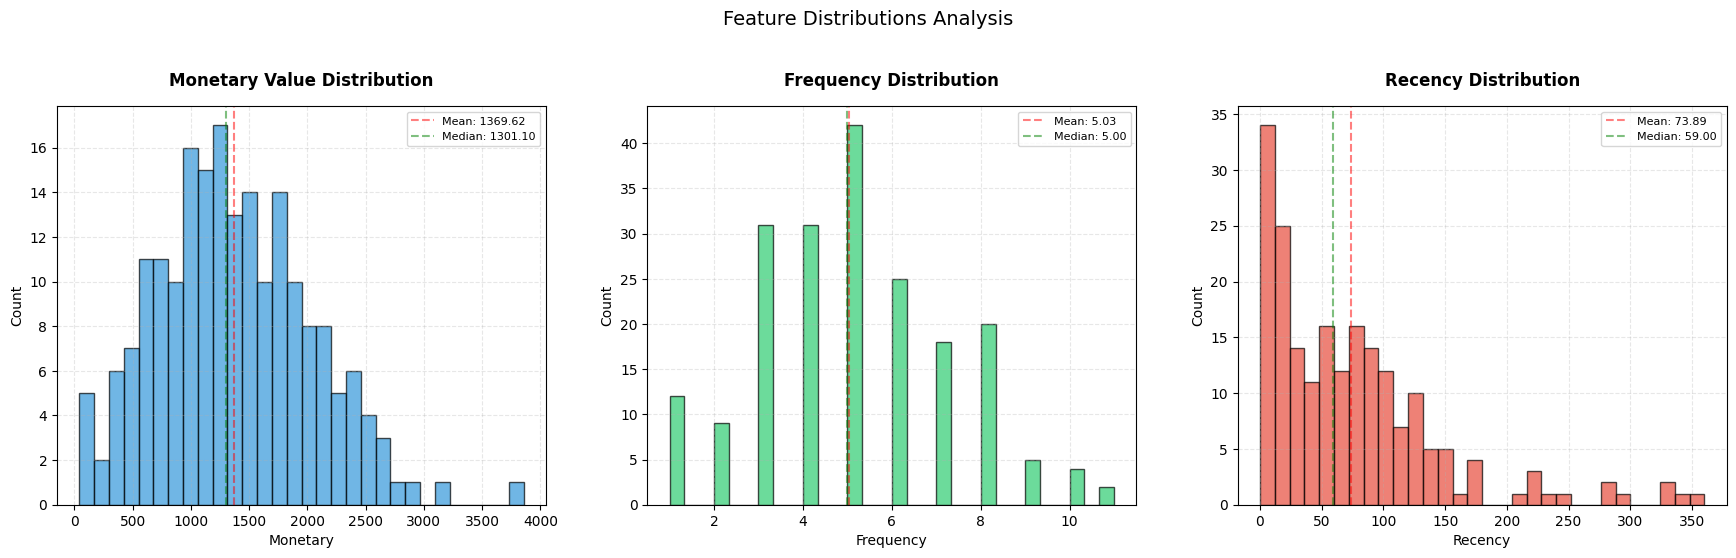

In [135]:
plot_feature_distributions(agg_df)

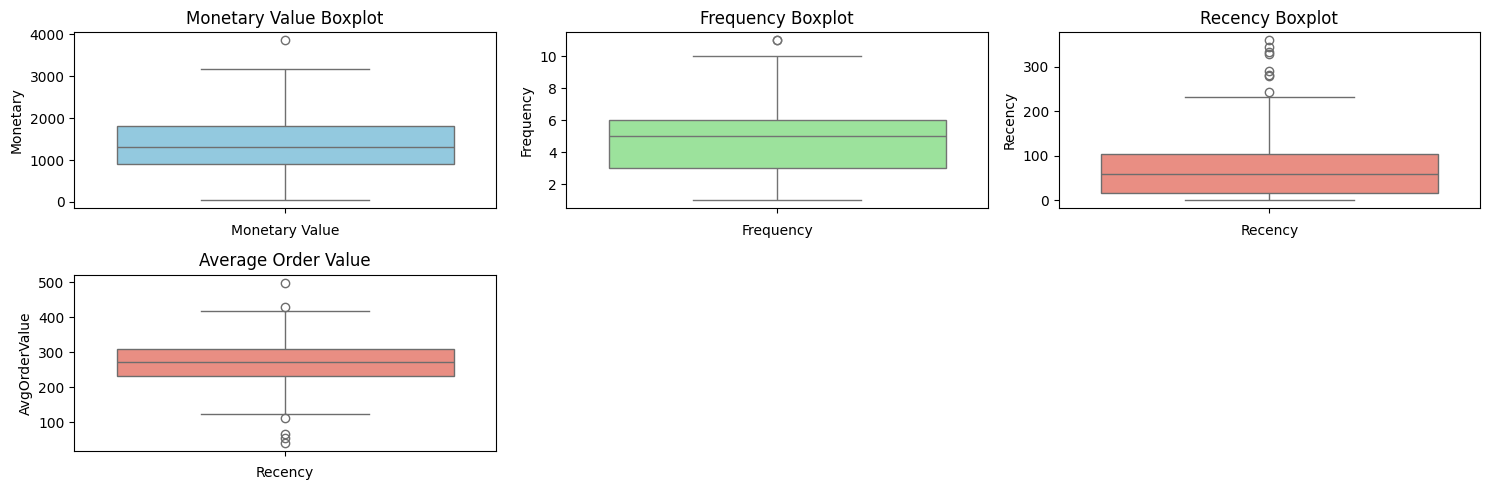

In [136]:
plt.figure(figsize=(15, 5))

plt.subplot(2, 3, 1)
sns.boxplot(data=agg_df['Monetary'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(2, 3, 2)
sns.boxplot(data=agg_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(2, 3, 3)
sns.boxplot(data=agg_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.subplot(2, 3, 4)
sns.boxplot(data=agg_df['AvgOrderValue'], color='salmon')
plt.title('Average Order Value')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

In [171]:
def remove_outliers(df, columns):

    df_clean = df.copy()
    
    for column in columns:
        # Calculate Q1, Q3, and IQR
        Q1 = df_clean[column].quantile(0.25)
        Q3 = df_clean[column].quantile(0.75)
        IQR = Q3 - Q1
        
        # Define outlier boundaries
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Print stats before removal
        outliers = df_clean[(df_clean[column] < lower_bound) | (df_clean[column] > upper_bound)]
        # Remove outliers
        df_clean = df_clean[(df_clean[column] >= lower_bound) & 
                           (df_clean[column] <= upper_bound)]
    
    return df_clean

# Example usage:
columns_to_clean = ['Monetary', 'Frequency', 'Recency']
clean_df = remove_outliers(agg_df, columns_to_clean)



In [172]:
clean_df

,Recency,Frequency,Monetary,AvgOrderValue,StdOrderValue
CustomerID,,,,,
C0001,55,5,1391.67,278.33,176.86
C0002,25,4,835.68,208.92,130.31
C0003,125,4,782.83,195.71,145.35
C0004,4,8,1925.09,240.64,80.75
C0005,54,3,874.81,291.60,135.63
...,...,...,...,...,...
C0196,13,4,1667.97,416.99,16.56
C0197,0,3,681.17,227.06,111.87
C0198,84,2,479.41,239.71,300.82


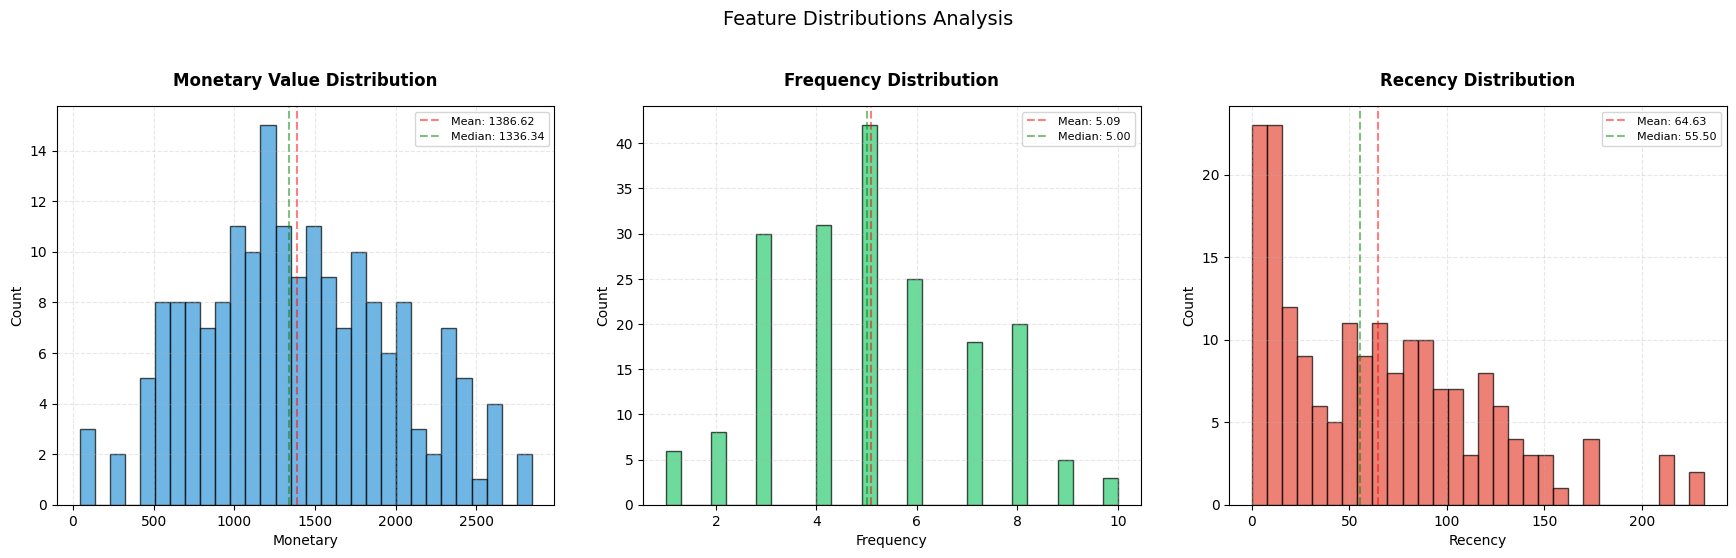

In [173]:
plot_feature_distributions(clean_df)

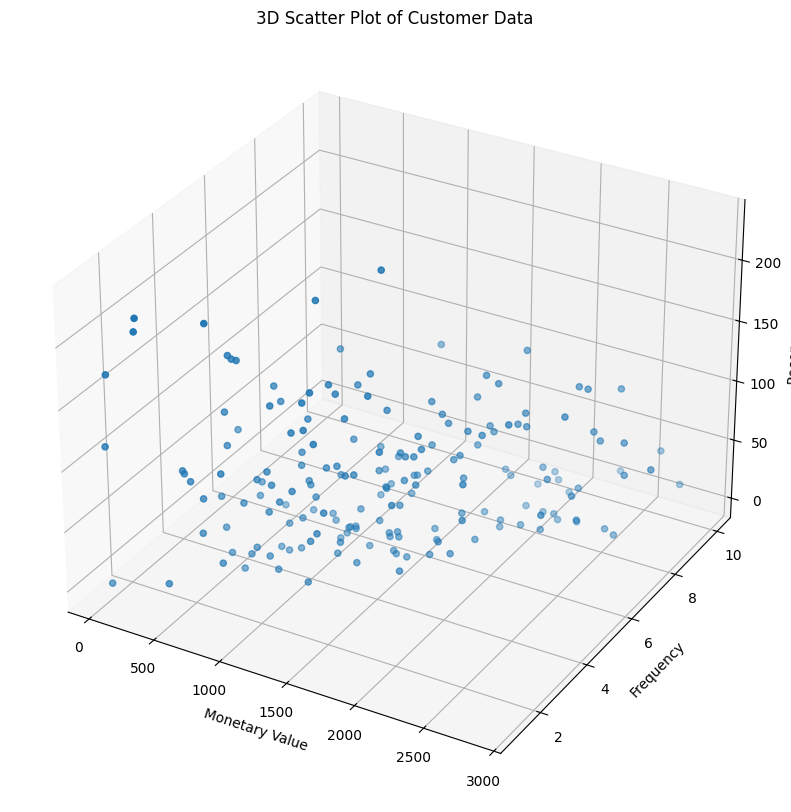

In [174]:
fig = plt.figure(figsize=(10, 10))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(clean_df["Monetary"], clean_df["Frequency"], clean_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [175]:
#scaler = StandardScaler()
#scaler = MinMaxScaler()
scaler = RobustScaler()
scaled_data = scaler.fit_transform(clean_df[["Monetary", "Frequency", "Recency"]])

In [176]:
scaled_data

array([[ 6.36567083e-02,  0.00000000e+00, -6.13496933e-03],
       [-5.76063007e-01, -5.00000000e-01, -3.74233129e-01],
       [-6.36871990e-01, -5.00000000e-01,  8.52760736e-01],
       [ 6.77407478e-01,  1.50000000e+00, -6.31901840e-01],
       [-5.31040196e-01, -1.00000000e+00, -1.84049080e-02],
       [-9.44063789e-03, -5.00000000e-01,  3.25153374e-01],
       [-3.29398296e-01, -1.00000000e+00,  8.52760736e-01],
       [ 1.12212423e+00,  2.50000000e+00, -5.46012270e-01],
       [-5.06083775e-01, -1.00000000e+00,  2.63803681e-01],
       [-8.32185614e-01, -5.00000000e-01, -1.77914110e-01],
       [ 1.45889784e-01,  0.00000000e+00, -6.56441718e-01],
       [ 6.43464904e-01,  1.00000000e+00, -6.44171779e-01],
       [ 1.04610437e+00,  1.00000000e+00, -6.13496933e-03],
       [-7.18851936e-01, -1.50000000e+00,  5.21472393e-01],
       [ 7.13835338e-01,  0.00000000e+00, -1.04294479e-01],
       [ 5.40705200e-01,  1.50000000e+00, -3.61963190e-01],
       [-7.43917663e-02,  0.00000000e+00

In [177]:
scaled_data_df = pd.DataFrame(scaled_data, index=clean_df.index, columns=("Monetary", "Frequency", "Recency"))

scaled_data_df

,Monetary,Frequency,Recency
CustomerID,,,
C0001,0.06,0.00,-0.01
C0002,-0.58,-0.50,-0.37
C0003,-0.64,-0.50,0.85
C0004,0.68,1.50,-0.63
C0005,-0.53,-1.00,-0.02
...,...,...,...
C0196,0.38,-0.50,-0.52
C0197,-0.75,-1.00,-0.68
C0198,-0.99,-1.50,0.35


In [178]:
def evaluate_kmeans_clustering(scaled_data_df, max_k=10, random_state=42):

    inertias = []
    silhouette_scores = []
    db_scores = []
    calinski_scores = []
    k_values = range(2, max_k + 1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state, max_iter=1000)
        cluster_labels = kmeans.fit_predict(scaled_data_df)
        
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(scaled_data_df, cluster_labels))
        db_scores.append(davies_bouldin_score(scaled_data_df, cluster_labels))
        calinski_scores.append(calinski_harabasz_score(scaled_data_df, cluster_labels))
    
    
    plt.figure(figsize=(20, 10))
    plt.subplot(2, 2, 1)
    plt.plot(k_values, inertias, marker='o', linewidth=2)
    plt.title('Elbow Method (Inertia)', fontsize=12, pad=15)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)
    
    plt.subplot(2, 2, 2)
    plt.plot(k_values, silhouette_scores, marker='o', color='orange', linewidth=2)
    plt.title('Silhouette Score', fontsize=12, pad=15)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)
    
    plt.subplot(2, 2, 3)
    plt.plot(k_values, db_scores, marker='o', color='green', linewidth=2)
    plt.title('Davies-Bouldin Index', fontsize=12, pad=15)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('DB Index')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)
    
    plt.subplot(2, 2, 4)
    plt.plot(k_values, calinski_scores, marker='o', color='red', linewidth=2)
    plt.title('Calinski-Harabasz Index', fontsize=12, pad=15)
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('CH Index')
    plt.grid(True, alpha=0.3)
    plt.xticks(k_values)
    
    plt.tight_layout()
    plt.show()
    
    optimal_k = {
        'elbow': k_values[find_elbow(inertias)],
        'silhouette': k_values[np.argmax(silhouette_scores)],
        'db_index': k_values[np.argmin(db_scores)],
        'calinski': k_values[np.argmax(calinski_scores)]
    }
    
    print("\nOptimal number of clusters according to different metrics:")
    for metric, k in optimal_k.items():
        print(f"{metric.capitalize()}: {k}")
    
    return optimal_k, {
        'inertias': inertias,
        'silhouette_scores': silhouette_scores,
        'db_scores': db_scores,
        'calinski_scores': calinski_scores
    }

def find_elbow(inertias):
    nPoints = len(inertias)
    allCoord = np.vstack((range(nPoints), inertias)).T
    firstPoint = allCoord[0]
    lineVec = allCoord[-1] - allCoord[0]
    lineVecNorm = lineVec / np.sqrt(np.sum(lineVec**2))
    vecFromFirst = allCoord - firstPoint
    scalarProduct = np.sum(vecFromFirst * np.tile(lineVecNorm, (nPoints, 1)), axis=1)
    vecFromFirstParallel = np.outer(scalarProduct, lineVecNorm)
    vecToLine = vecFromFirst - vecFromFirstParallel
    distToLine = np.sqrt(np.sum(vecToLine ** 2, axis=1))
    return np.argmax(distToLine)

def perform_final_clustering(scaled_data_df, n_clusters, random_state=42):
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)
    
    final_metrics = {
        'silhouette': silhouette_score(scaled_data_df, cluster_labels),
        'db_index': davies_bouldin_score(scaled_data_df, cluster_labels),
        'calinski': calinski_harabasz_score(scaled_data_df, cluster_labels)
    }
    
    print("\nFinal Clustering Metrics:")
    for metric, value in final_metrics.items():
        print(f"{metric.capitalize()}: {value:.3f}")
    
    return cluster_labels, final_metrics



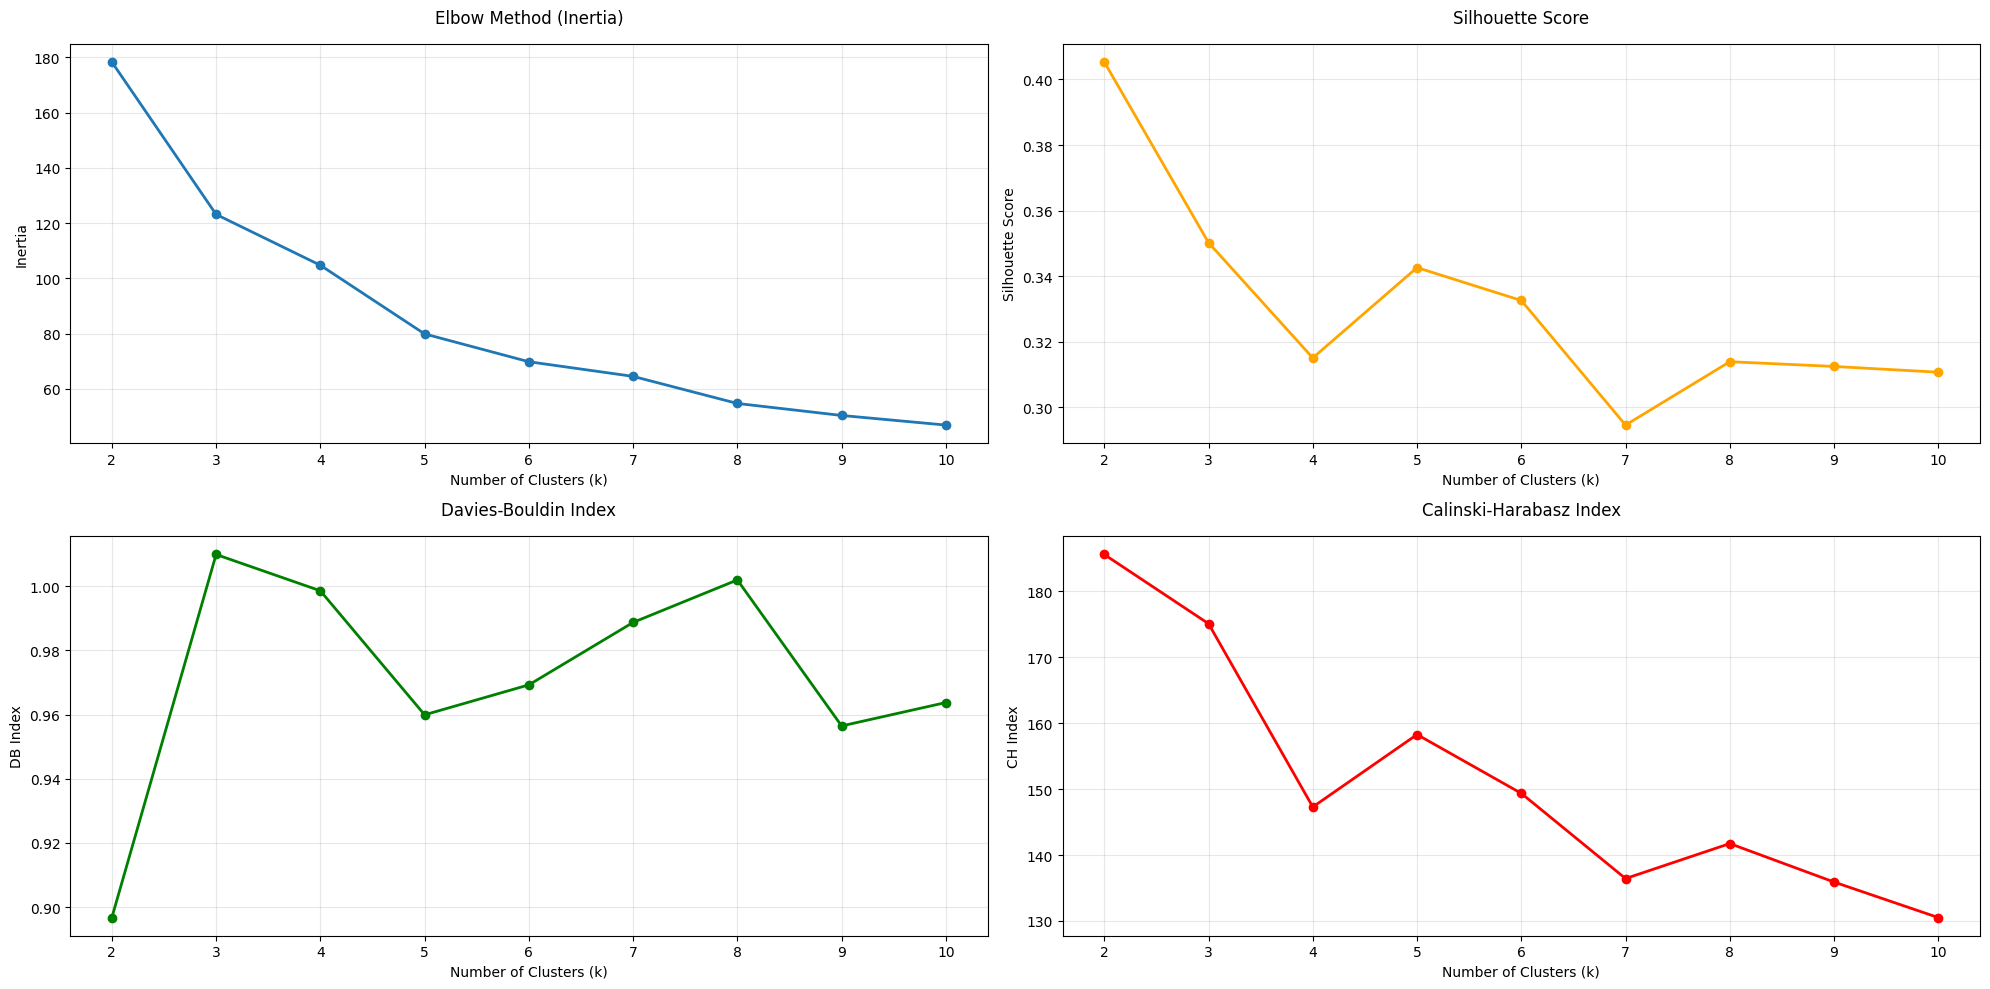


Optimal number of clusters according to different metrics:
Elbow: 5
Silhouette: 2
Db_index: 2
Calinski: 2

Final Clustering Metrics:
Silhouette: 0.405
Db_index: 0.897
Calinski: 185.609


In [179]:

optimal_k, metrics = evaluate_kmeans_clustering(scaled_data_df)
chosen_k = optimal_k['db_index'] 
cluster_labels, final_metrics = perform_final_clustering(scaled_data_df, chosen_k)

In [180]:
clean_df['cluster_labels'] = cluster_labels

In [181]:
clean_df

,Recency,Frequency,Monetary,AvgOrderValue,StdOrderValue,cluster_labels
CustomerID,,,,,,
C0001,55,5,1391.67,278.33,176.86,1
C0002,25,4,835.68,208.92,130.31,1
C0003,125,4,782.83,195.71,145.35,1
C0004,4,8,1925.09,240.64,80.75,0
C0005,54,3,874.81,291.60,135.63,1
...,...,...,...,...,...,...
C0196,13,4,1667.97,416.99,16.56,1
C0197,0,3,681.17,227.06,111.87,1
C0198,84,2,479.41,239.71,300.82,1


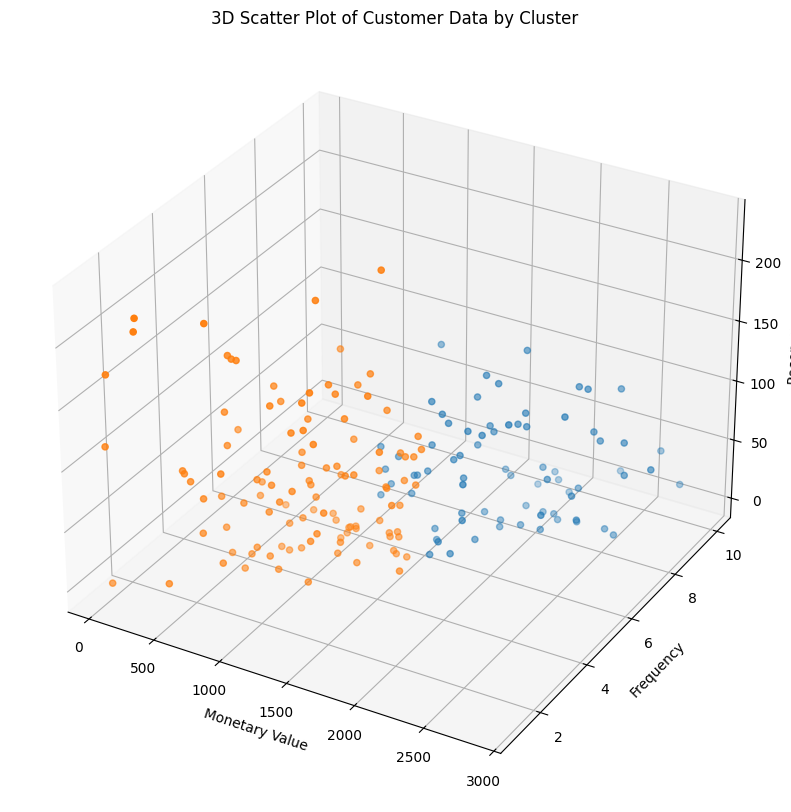

In [182]:
cluster_colors = {0: '#1f77b4',  
                  1: '#ff7f0e',  
                  2: '#2ca02c',  
                  3: '#d62728',
                  4: '#e45656'
                  }  

colors = clean_df['cluster_labels'].map(cluster_colors)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(clean_df['Monetary'], 
                     clean_df['Frequency'], 
                     clean_df['Recency'], 
                     c=colors,  
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

In [183]:
cluster_labels

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1])

In [184]:
clean_df

,Recency,Frequency,Monetary,AvgOrderValue,StdOrderValue,cluster_labels
CustomerID,,,,,,
C0001,55,5,1391.67,278.33,176.86,1
C0002,25,4,835.68,208.92,130.31,1
C0003,125,4,782.83,195.71,145.35,1
C0004,4,8,1925.09,240.64,80.75,0
C0005,54,3,874.81,291.60,135.63,1
...,...,...,...,...,...,...
C0196,13,4,1667.97,416.99,16.56,1
C0197,0,3,681.17,227.06,111.87,1
C0198,84,2,479.41,239.71,300.82,1


In [185]:
clean_df.shape

(188, 6)

In [186]:
df2.shape

(1000, 12)

In [187]:
df2.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,Price,ProductName,Category,CustomerName,Region,SignupDate,Sales
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11,601.36
4,T00363,C0070,P067,2024-03-21 15:10:10,3,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15,902.04


In [188]:
def process_dataframes(df, clean_df):
    valid_customers = clean_df.index.tolist()
    filtered_df = df[df['CustomerID'].isin(valid_customers)].copy()
    cluster_mapping = clean_df['cluster_labels'].to_dict()
    filtered_df.loc[:, 'cluster_labels'] = filtered_df['CustomerID'].map(cluster_mapping)
    
    return filtered_df

In [189]:
filtered_df = process_dataframes(df2,clean_df)

In [190]:
filtered_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,Price,ProductName,Category,CustomerName,Region,SignupDate,Sales,cluster_labels
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,Andrea Jenkins,Europe,2022-12-03,300.68,1
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,Brittany Harvey,Asia,2024-09-04,300.68,1
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,ComfortLiving Bluetooth Speaker,Electronics,Kathryn Stevens,Europe,2024-04-04,300.68,0
3,T00272,C0087,P067,2024-03-26 22:55:37,2,300.68,ComfortLiving Bluetooth Speaker,Electronics,Travis Campbell,South America,2024-04-11,601.36,0
4,T00363,C0070,P067,2024-03-21 15:10:10,3,300.68,ComfortLiving Bluetooth Speaker,Electronics,Timothy Perez,Europe,2022-03-15,902.04,1


Generating cluster analysis...

Cluster Profiles:


,Customer Count,Avg Purchase Value,Total Revenue,Avg Quantity,Total Quantity,Top Category,Top Region,Avg Price,Customer %
cluster_labels,,,,,,,,,
0,530,690.06,365732.40,2.50,1323,Books,South America,276.84,55.38
1,427,687.07,293377.58,2.56,1095,Books,South America,266.88,44.62



Category Distribution by Cluster (%):


Category,Books,Clothing,Electronics,Home Decor
cluster_labels,,,,
0,27.36,22.08,26.23,24.34
1,26.93,22.48,25.06,25.53



Region Distribution by Cluster (%):


Region,Asia,Europe,North America,South America
cluster_labels,,,,
0,24.53,18.49,23.40,33.58
1,19.91,28.57,22.01,29.51


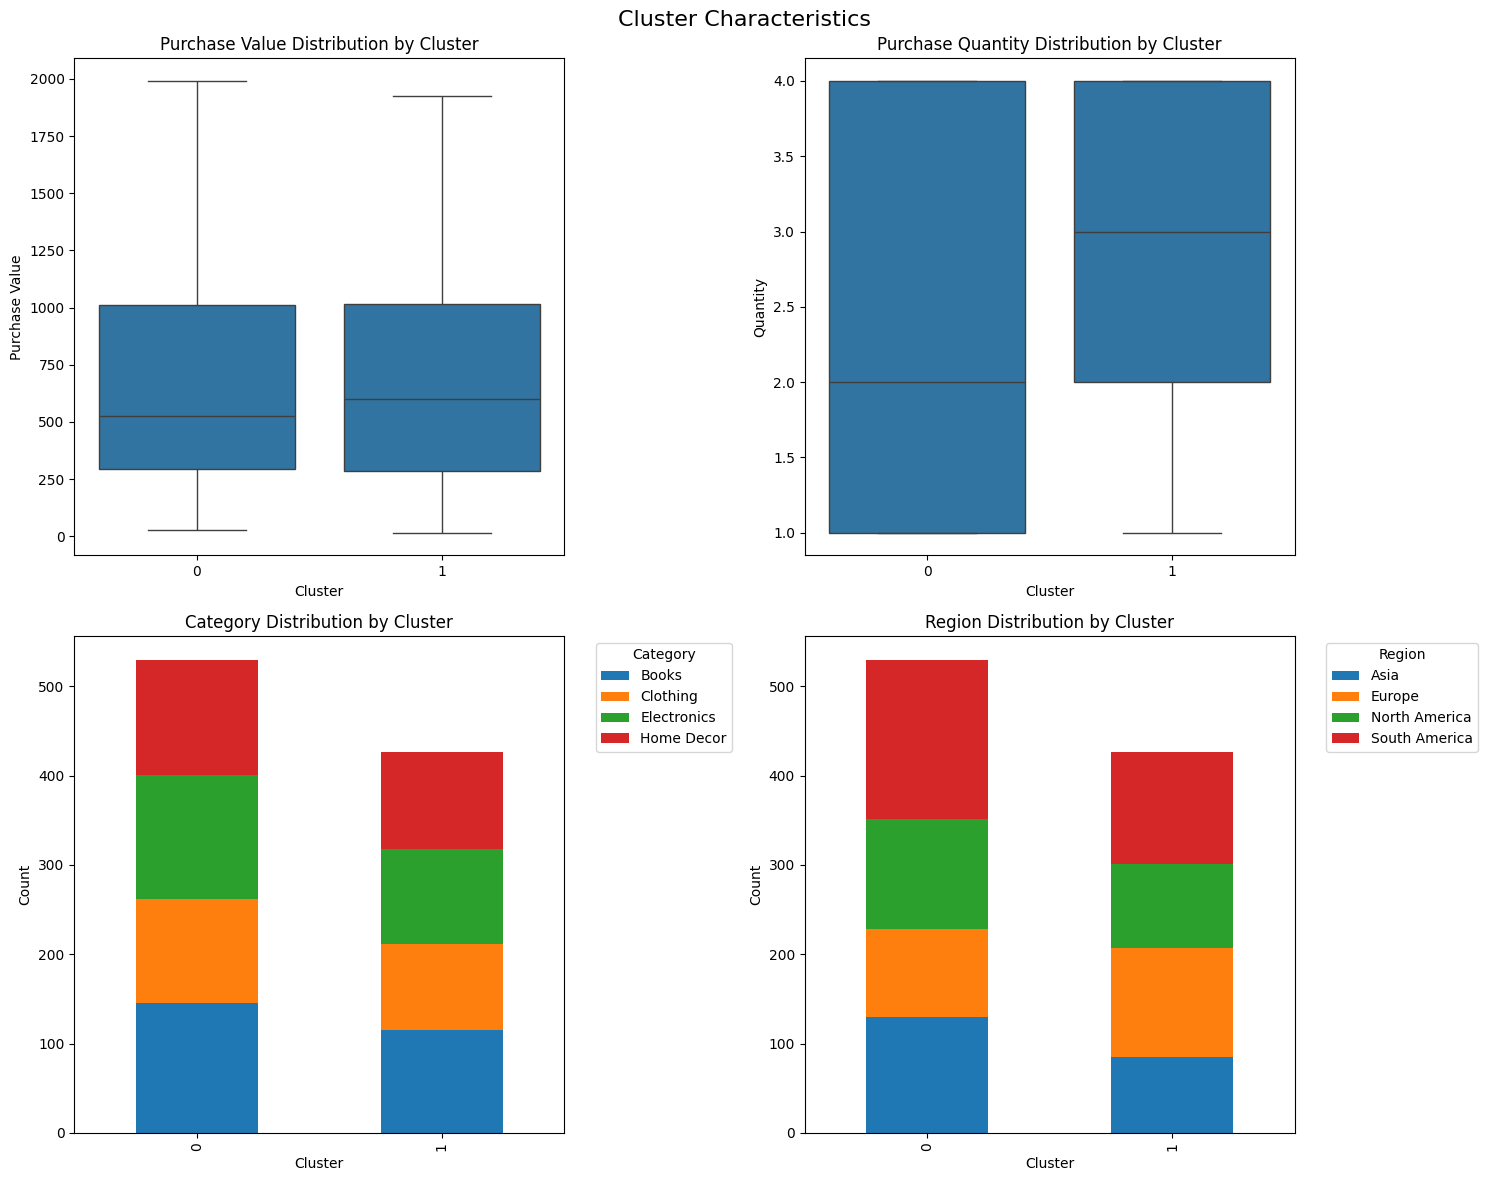


Detailed Cluster Profiles:

        Cluster 0 Profile:
        ------------------------
        Size: 75 customers (39.9% of total)
        Average Purchase Value: $690.06
        Average Price Point: $276.84
        Average Quantity per Transaction: 2.50
        Primary Category: Books
        Primary Region: South America
        
        Top 3 Categories:
        Category
Books          145
Electronics    139
Home Decor     129
        
        Top 3 Products:
        ProductName
ActiveWear Smartwatch    24
SoundWave Headphones     21
ActiveWear Rug           17
        
        Customer Behavior Profile:
        - High value customers
        - Low volume purchases
        - Price sensitivity: Low
        

        Cluster 1 Profile:
        ------------------------
        Size: 113 customers (60.1% of total)
        Average Purchase Value: $687.07
        Average Price Point: $266.88
        Average Quantity per Transaction: 2.56
        Primary Category: Books
        Primary R

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from IPython.display import display


def analyze_clusters(df):
    cluster_profiles = df.groupby('cluster_labels').agg({
        'CustomerID': 'count', 
        'Sales': ['mean', 'sum'],  
        'Quantity': ['mean', 'sum'],  
        'Category': lambda x: x.value_counts().index[0], 
        'Region': lambda x: x.value_counts().index[0], 
        'Price': 'mean' 
    }).round(2)
    
    
    cluster_profiles.columns = [
        'Customer Count', 'Avg Purchase Value', 'Total Revenue',
        'Avg Quantity', 'Total Quantity', 'Top Category', 'Top Region',
        'Avg Price'
    ]
    
    
    cluster_profiles['Customer %'] = (cluster_profiles['Customer Count'] / 
                                    cluster_profiles['Customer Count'].sum() * 100).round(2)
    
    return cluster_profiles

def analyze_category_distribution(df):
    
    category_dist = pd.crosstab(
        df['cluster_labels'], 
        df['Category'], 
        normalize='index'
    ) * 100
    
    return category_dist.round(2)

def analyze_region_distribution(df):
    
    region_dist = pd.crosstab(
        df['cluster_labels'], 
        df['Region'], 
        normalize='index'
    ) * 100
    
    return region_dist.round(2)

def plot_cluster_characteristics(df):
    
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Cluster Characteristics', fontsize=16)
    
   
    sns.boxplot(x='cluster_labels', y='Sales', data=df, ax=axes[0,0])
    axes[0,0].set_title('Purchase Value Distribution by Cluster')
    axes[0,0].set_xlabel('Cluster')
    axes[0,0].set_ylabel('Purchase Value')
    
    
    sns.boxplot(x='cluster_labels', y='Quantity', data=df, ax=axes[0,1])
    axes[0,1].set_title('Purchase Quantity Distribution by Cluster')
    axes[0,1].set_xlabel('Cluster')
    axes[0,1].set_ylabel('Quantity')
    
    
    category_dist = pd.crosstab(df['cluster_labels'], df['Category'])
    category_dist.plot(kind='bar', stacked=True, ax=axes[1,0])
    axes[1,0].set_title('Category Distribution by Cluster')
    axes[1,0].set_xlabel('Cluster')
    axes[1,0].set_ylabel('Count')
    axes[1,0].legend(title='Category', bbox_to_anchor=(1.05, 1))
    
    
    region_dist = pd.crosstab(df['cluster_labels'], df['Region'])
    region_dist.plot(kind='bar', stacked=True, ax=axes[1,1])
    axes[1,1].set_title('Region Distribution by Cluster')
    axes[1,1].set_xlabel('Cluster')
    axes[1,1].set_ylabel('Count')
    axes[1,1].legend(title='Region', bbox_to_anchor=(1.05, 1))
    
    plt.tight_layout()
    plt.show()

def generate_cluster_profiles(df):
    """Generate detailed profiles for each cluster"""
    profiles = []
    
    for cluster in sorted(df['cluster_labels'].unique()):
        cluster_data = df[df['cluster_labels'] == cluster]
        
        
        avg_value = cluster_data['Sales'].mean()
        avg_quantity = cluster_data['Quantity'].mean()
        avg_price = cluster_data['Price'].mean()
        top_category = cluster_data['Category'].mode().iloc[0]
        top_region = cluster_data['Region'].mode().iloc[0]
        customer_count = len(cluster_data['CustomerID'].unique())
        
        
        category_prefs = cluster_data['Category'].value_counts().nlargest(3)
        top_products = cluster_data['ProductName'].value_counts().nlargest(3)
        
        
        profile = f"""
        Cluster {cluster} Profile:
        ------------------------
        Size: {customer_count} customers ({(customer_count/len(df['CustomerID'].unique())*100):.1f}% of total)
        Average Purchase Value: ${avg_value:.2f}
        Average Price Point: ${avg_price:.2f}
        Average Quantity per Transaction: {avg_quantity:.2f}
        Primary Category: {top_category}
        Primary Region: {top_region}
        
        Top 3 Categories:
        {category_prefs.to_string()}
        
        Top 3 Products:
        {top_products.to_string()}
        
        Customer Behavior Profile:
        - {'High' if avg_value > df['Sales'].mean() else 'Low'} value customers
        - {'High' if avg_quantity > df['Quantity'].mean() else 'Low'} volume purchases
        - Price sensitivity: {'Low' if avg_price > df['Price'].mean() else 'High'}
        """
        profiles.append(profile)
    
    return profiles


print("Generating cluster analysis...")


cluster_profiles = analyze_clusters(filtered_df)
print("\nCluster Profiles:")
display(cluster_profiles)

category_dist = analyze_category_distribution(filtered_df)
print("\nCategory Distribution by Cluster (%):")
display(category_dist)


region_dist = analyze_region_distribution(filtered_df)
print("\nRegion Distribution by Cluster (%):")
display(region_dist)


plot_cluster_characteristics(filtered_df)


print("\nDetailed Cluster Profiles:")
profiles = generate_cluster_profiles(filtered_df)
for profile in profiles:
    print(profile)


filtered_df.to_csv('outputs/clustered_customers.csv', index=False)
print("\nResults saved to 'outputs/clustered_customers.csv'")